<a href="https://colab.research.google.com/github/Godwin234/Linear-Regression/blob/master/multi2MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install seaborn


In [25]:
from __future__ import absolute_import, division, print_function
import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


print(tf.__version__)

1.13.1


In [26]:
dataset_path = keras.utils.get_file('auto-mpg.data','https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [27]:
column_names = ['MPG', 'Cylinders', 'displacement', 'Horsepower','Weight',
               'Acceleration', 'Model Year','Origin']
raw_dataset = pd.read_csv(dataset_path, names = column_names,
                          na_values = "?", comment = '\t',
                         sep = " ", skipinitialspace = True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [28]:
dataset.isna().sum()

MPG             0
Cylinders       0
displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
dataset = dataset.dropna()

In [0]:
origin = dataset.pop('Origin')

In [31]:
dataset["USA"] = (origin == 1)*1.0
dataset["Europe"] = (origin == 2)*1.0
dataset["Japan"] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [0]:
train_dataset = dataset.sample(frac=0.9, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

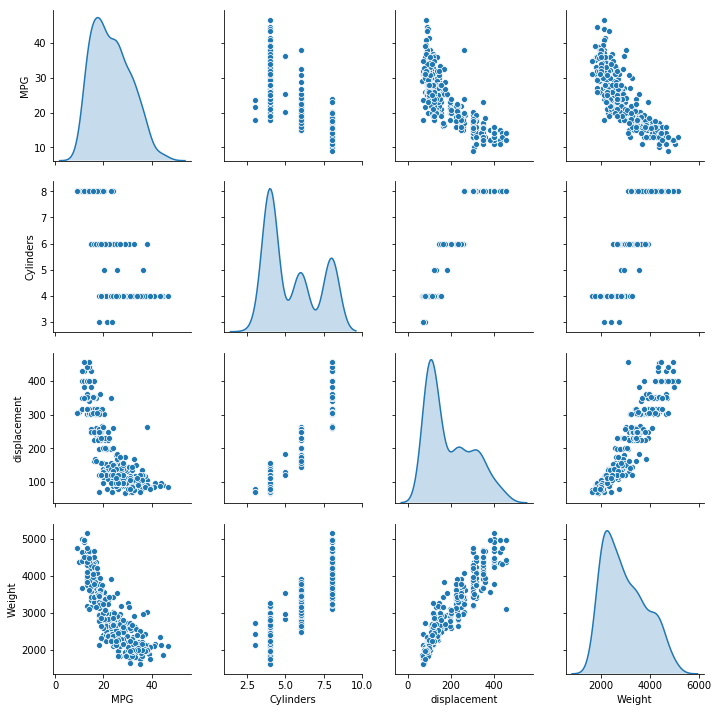

In [33]:
sns.pairplot(train_dataset[['MPG','Cylinders','displacement','Weight']],
            diag_kind = 'kde')

In [34]:
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,353.0,5.473088,1.705601,3.0,4.0,4.0,8.0,8.0
displacement,353.0,194.426346,104.761432,68.0,105.0,151.0,267.0,455.0
Horsepower,353.0,104.849858,38.125803,46.0,76.0,95.0,129.0,225.0
Weight,353.0,2981.167139,855.055728,1613.0,2226.0,2800.0,3609.0,5140.0
Acceleration,353.0,15.526346,2.727889,8.0,13.7,15.5,17.0,24.8
Model Year,353.0,75.920680,3.684187,70.0,73.0,76.0,79.0,82.0
USA,353.0,0.626062,0.484534,0.0,0.0,1.0,1.0,1.0
Europe,353.0,0.175637,0.381051,0.0,0.0,0.0,0.0,1.0
Japan,353.0,0.198300,0.399286,0.0,0.0,0.0,0.0,1.0


In [0]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [0]:
def norm(x):
  return(x - train_stats['mean'])/ train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)


In [0]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation = tf.nn.relu,
                   input_shape = [len(train_dataset.keys())]),
      layers.Dense(64, activation = tf.nn.relu),
      layers.Dense(1)
  ])
  
  optimizer = tf.keras.optimizers.SGD(0.0009)
  
  model.compile(loss = 'mse',
                 optimizer = optimizer, metrics = ['mse'])
  return model
  

In [0]:
model = build_model()

In [173]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_76 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [174]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print("")
    print('.', end = '')
    
Iterations = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs = Iterations, validation_split = 0.2, verbose = 0,
    callbacks = [PrintDot()]
    
      )


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [176]:
hist = pd.DataFrame(history.history)

hist['epoch'] = history.epoch
hist.head()
print(pd.DataFrame(history.history))


           loss  mean_squared_error    val_loss  val_mean_squared_error
0    561.348431          561.348389  512.526843              512.526794
1    383.667342          383.667328  203.737263              203.737259
2     88.606504           88.606506   27.578236               27.578236
3     27.259222           27.259222   16.921722               16.921722
4     19.395822           19.395823   13.206661               13.206660
5     16.080740           16.080740   11.002701               11.002700
6     14.498473           14.498473    9.864200                9.864200
7     13.559685           13.559685    9.088701                9.088700
8     12.550256           12.550255    8.782979                8.782978
9     11.836843           11.836843    8.879125                8.879126
10    11.278357           11.278356    8.196116                8.196116
11    10.970630           10.970631    6.994799                6.994799
12    10.690398           10.690397    7.351441                7

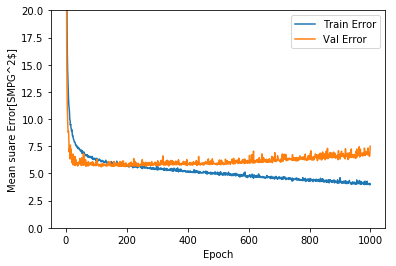

In [177]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch']= history.epoch
  
  plt. figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean suare Error[SMPG^2$]')
  plt.plot(hist['epoch'],hist['mean_squared_error'],
          label = 'Train Error')
  plt.plot(hist['epoch'],hist['val_mean_squared_error'],
          label = 'Val Error')
  plt.legend()
  plt.ylim([0,20])
  
  
plot_history(history)

In [124]:
loss, mse,  = model.evaluate(normed_test_data, test_labels, verbose = 0)

print('Testing set Mean Square Error: {:5.2f} MPG'.format(mse))


Testing set Mean Square Error:  7.18 MPG


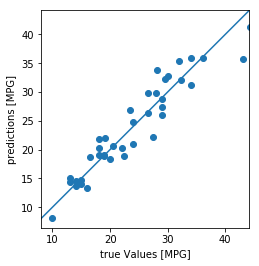

In [125]:
test_prediction = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_prediction)
plt.xlabel('true Values [MPG]')
plt.ylabel('predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([8,plt.xlim()[1]])
plt.xlim([8,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100,100])